**Decision Tree**


In [3]:
import numpy as np
import pandas as pd
from sklearn import tree

input_file = "/content/drive/My Drive/ML Course materials/PastHires.csv"
df= pd.read_csv(input_file, header = 0) #read a csv and convert the file to a dataframe
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


sckit-learn requires data to be numericals so lets map Y to 1 and N to 0, and the education levels to scale of 0-3

In [4]:
d = {'Y':1,'N':0} #creating a dictionary to map the Y and N to 1 and 0
df['Hired'] = df['Hired'].map(d)#maps all the Y and N to 1 and 0
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)

e = {'BS':0, 'MS':1, 'PhD':2}#mapping the level of education to 0-2 scale
df['Level of Education'] = df['Level of Education'].map(e)
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


Taking the header of the df for making decision tree.

In [5]:
headers = list(df.columns[:6])
headers

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

Making decision tree



In [0]:
y = df['Hired']
X = df[headers]
clf = tree.DecisionTreeClassifier() #create a instance of the classifier
clf = clf.fit(X,y) 

gini score is the measure of the enropy. samples are the number of the sample.

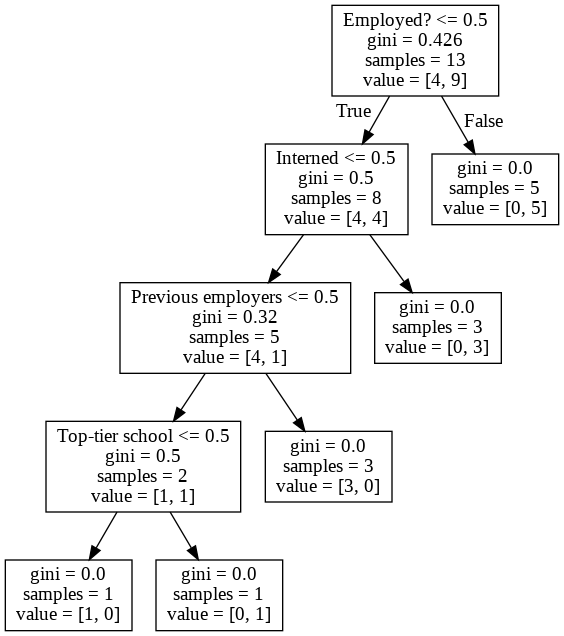

In [7]:
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=headers)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Random Forest: Enabling a random forest of 10 decision tree to predict employment.

In [0]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X,y)

Lets predict employment of sample candidates...

In [12]:
print(clf.predict([[10,1,4,0,1,0]]))
print(clf.predict([[10,0,4,0,0,1]]))
print(clf.predict([[10,1,4,0,0,0]]))
print(clf.predict([[1,0,4,0,0,0]]))

[1]
[1]
[1]
[0]
